In [45]:
dataset=[]
for i in range(1,100001):
    dataset.append(i/100)

In [46]:
def mean_calc(data_list):
    return sum(data_list)/len(data_list)

In [47]:
def var_calc(data_list):
    mean_val=mean_calc(data_list)
    var=0
    for i in data_list:
        var+=(i-mean_val)**2
    return var/len(data_list)

A)

In [48]:
true_variance=var_calc(dataset)
print(true_variance)

83333.333325


B)

In [49]:
import random

In [50]:
cumulative_s1=[]
cumulative_s2=[]
cumulative_s3=[]
iterations=1000

In [51]:
def sampling(iterations,cumulative_s1,cumulative_s2,cumulative_s3):
    cumulative_s1=[]
    cumulative_s2=[]
    cumulative_s3=[]
    for i in range(iterations):
        sample=[]
        for i in range(50):
            rand_index=random.randint(0,99999)
            sample.append(dataset[rand_index])
        # print(sample)

        s2=var_calc(sample)
        s1=s2*len(sample)/(len(sample)+1)
        s3=s2*len(sample)/(len(sample)-1)

        if cumulative_s3==[]:
            cumulative_s1.append(s1)
            cumulative_s2.append(s2)
            cumulative_s3.append(s3)
        else:
            cumulative_s1.append(s1+cumulative_s1[-1])
            cumulative_s2.append(s2+cumulative_s2[-1])
            cumulative_s3.append(s3+cumulative_s3[-1])

    for i in range(iterations):
        cumulative_s1[i]=cumulative_s1[i]/(i+1)
        cumulative_s2[i]=cumulative_s2[i]/(i+1)
        cumulative_s3[i]=cumulative_s3[i]/(i+1)
    return cumulative_s1,cumulative_s2,cumulative_s3

In [52]:
import matplotlib.pyplot as plt

In [53]:
cumulative_s1_iterations=[]
cumulative_s2_iterations=[]
cumulative_s3_iterations=[]

In [54]:
for i in range(5):
    cumulative_s1,cumulative_s2,cumulative_s3=sampling(iterations,cumulative_s1,cumulative_s2,cumulative_s3)
    cumulative_s1_iterations.append(cumulative_s1)
    cumulative_s2_iterations.append(cumulative_s2)
    cumulative_s3_iterations.append(cumulative_s3)

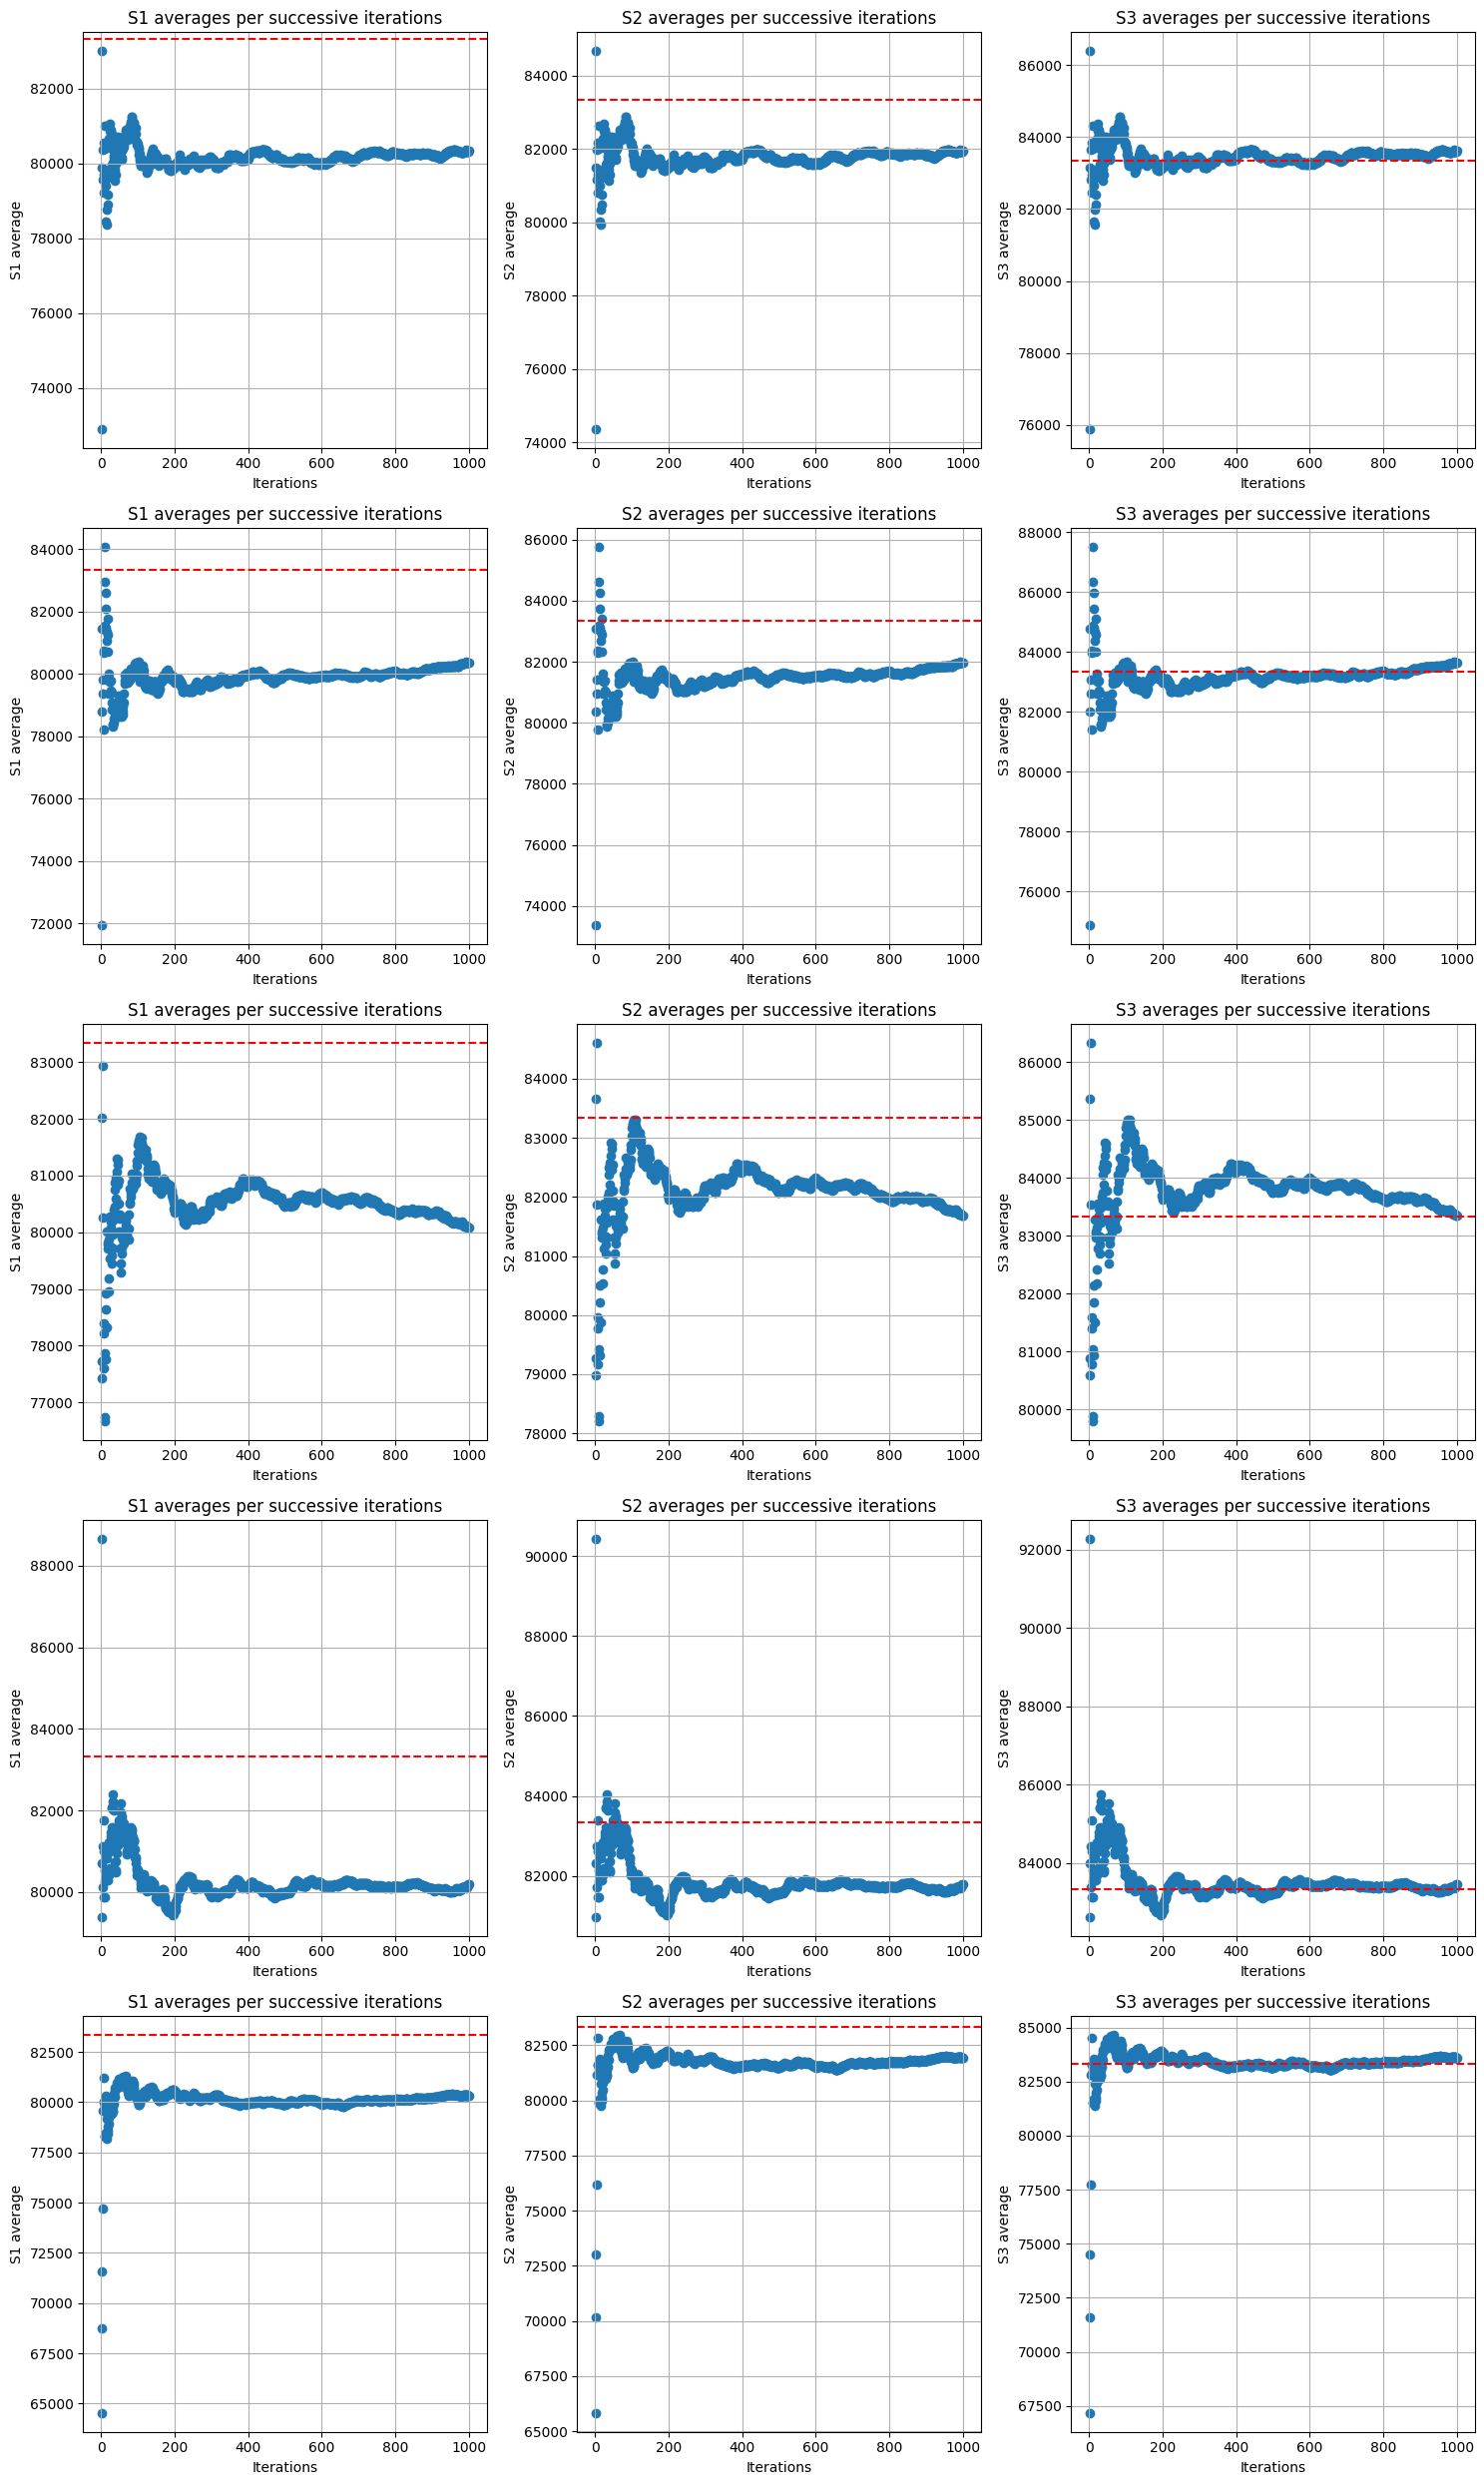

In [55]:
plt.figure(figsize=(15, 25))

x_axis=range(1,iterations+1)
for i in range(5):
    plt.subplot(5,3,1+3*i)
    plt.scatter(x_axis,cumulative_s1_iterations[i])
    plt.axhline(y=83333.333325, color='r', linestyle='--')
    plt.title('S1 averages per successive iterations')
    plt.xlabel('Iterations')
    plt.ylabel('S1 average')
    plt.grid(True)

    plt.subplot(5,3,2+3*i)
    plt.scatter(x_axis,cumulative_s2_iterations[i])
    plt.axhline(y=83333.333325, color='r', linestyle='--')
    plt.title('S2 averages per successive iterations')
    plt.xlabel('Iterations')
    plt.ylabel('S2 average')
    plt.grid(True)

    plt.subplot(5,3,3+3*i)
    plt.scatter(x_axis,cumulative_s3_iterations[i])
    plt.axhline(y=83333.333325, color='r', linestyle='--')
    plt.title('S3 averages per successive iterations')
    plt.xlabel('Iterations')
    plt.ylabel('S3 average')
    plt.grid(True)


plt.tight_layout()
plt.show()